In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
!ls ..

classifier.py		     __pycache__
cls_magret		     README.md
create_pretraining_data.py   requirements-3_5.txt
extract_features.py	     requirements-3_7.txt
funcname_magret		     run_classifier.sh
__init__.py		     run_create_data.sh
modeling.py		     run_mlm.sh
modeling.pyc		     run_prepare_data.sh
modeling_test.py	     run_prepare_single_data.sh
multimask		     run_pretraining.py
notebook		     sparse
optimization.py		     split_magret
optimization.pyc	     tokenization.py
optimization_test.py	     tokenization.pyc
prepare_pretraining_data.py  tokenization_test.py
py35			     utils
py37			     varname


In [35]:
results_df = pd.read_csv('../funcname_magret/pretraining_output/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,25,25,11,2,6,44,25,140,43,237,...,0,0,0,0,0,0,0,0,0,0
1,53,38,5,2,237,25,776,38,4,30,...,0,0,0,0,0,0,0,0,0,0
2,1142,1142,9,2,53,1142,417,230,110,25,...,0,0,0,0,0,0,0,0,0,0
3,111,111,1,2,4,127,44,53,25,25,...,0,0,0,0,0,0,0,0,0,0
4,319,319,7,2,603,30,25,257,319,319,...,0,0,0,0,0,0,0,0,0,0
5,257,257,14,2,6,44,1142,856,857,25,...,0,0,0,0,0,0,0,0,0,0
6,469,469,44,2,6,44,38,30,25,257,...,0,0,0,0,0,0,0,0,0,0
7,25,25,6,2,57,58,59,107,237,4,...,0,0,0,0,0,0,0,0,0,0
8,319,319,14,2,38,38,38,38,426,242,...,0,0,0,0,0,0,0,0,0,0
9,242,242,8,2,38,38,1142,366,25,81,...,0,0,0,0,0,0,0,0,0,0


In [36]:
vocab_df = pd.read_csv('../multimask/vocab-code.txt', header=None)
vocab_df.shape

(1156, 1)

In [37]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.shape

(1146, 1)

In [38]:
set(vocab_df[0]) - set(vocab_df2[0])

{'[cls]',
 'accuracy',
 'batches',
 'categorical',
 'cw',
 'existing',
 'lengths',
 'modes',
 'ref',
 'score',
 'suffix'}

In [39]:
len(vocab_df)

1156

In [40]:
accuracy = 0

In [41]:
per_token_acc = {}; per_token_count = {}

In [42]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [43]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [44]:
import matplotlib.pyplot as plt

In [45]:
from collections import Counter
import numpy as np

In [50]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('sparse', 1.0),
 ('usub', 1.0),
 ('crossentropy', 1.0),
 ('expand', 1.0),
 ('parameter', 1.0),
 ('join', 1.0),
 ('initial', 1.0),
 ('abstractconv2d', 1.0),
 ('set', 1.0),
 ('randint', 1.0),
 ('row', 1.0),
 ('stateful', 1.0),
 ('outs', 1.0),
 ('iterations', 1.0),
 ('col', 1.0),
 ('xs', 1.0),
 ('custom', 1.0),
 ('types', 1.0),
 ('normalization', 1.0),
 ('maximum', 1.0),
 ('go', 1.0),
 ('headers', 1.0),
 ('cls', 1.0),
 ('part', 1.0),
 ('end', 1.0),
 ('times', 1.0),
 ('floatx', 1.0),
 ('conv2d', 1.0),
 ('queue', 1.0),
 ('inferreddimension', 1.0),
 ('stack', 1.0),
 ('run', 1.0),
 ('pad', 1.0),
 ('expected', 1.0),
 ('supports', 1.0),
 ('less', 1.0),
 ('equal', 1.0),
 ('any', 1.0),
 ('freedimension', 1.0),
 ('masking', 1.0),
 ('totals', 1.0),
 ('workers', 1.0),
 ('dumps', 1.0),
 ('deconv', 1.0),
 ('lte', 1.0),
 ('attrs', 1.0),
 ('beta', 1.0),
 ('hsplit', 1.0),
 ('truncated', 1.0),
 ('nn', 1.0),
 ('numpy', 1.0),
 ('backwards', 1.0),
 ('boolop', 0.9776119402985075),
 ('items', 0.9740259740259

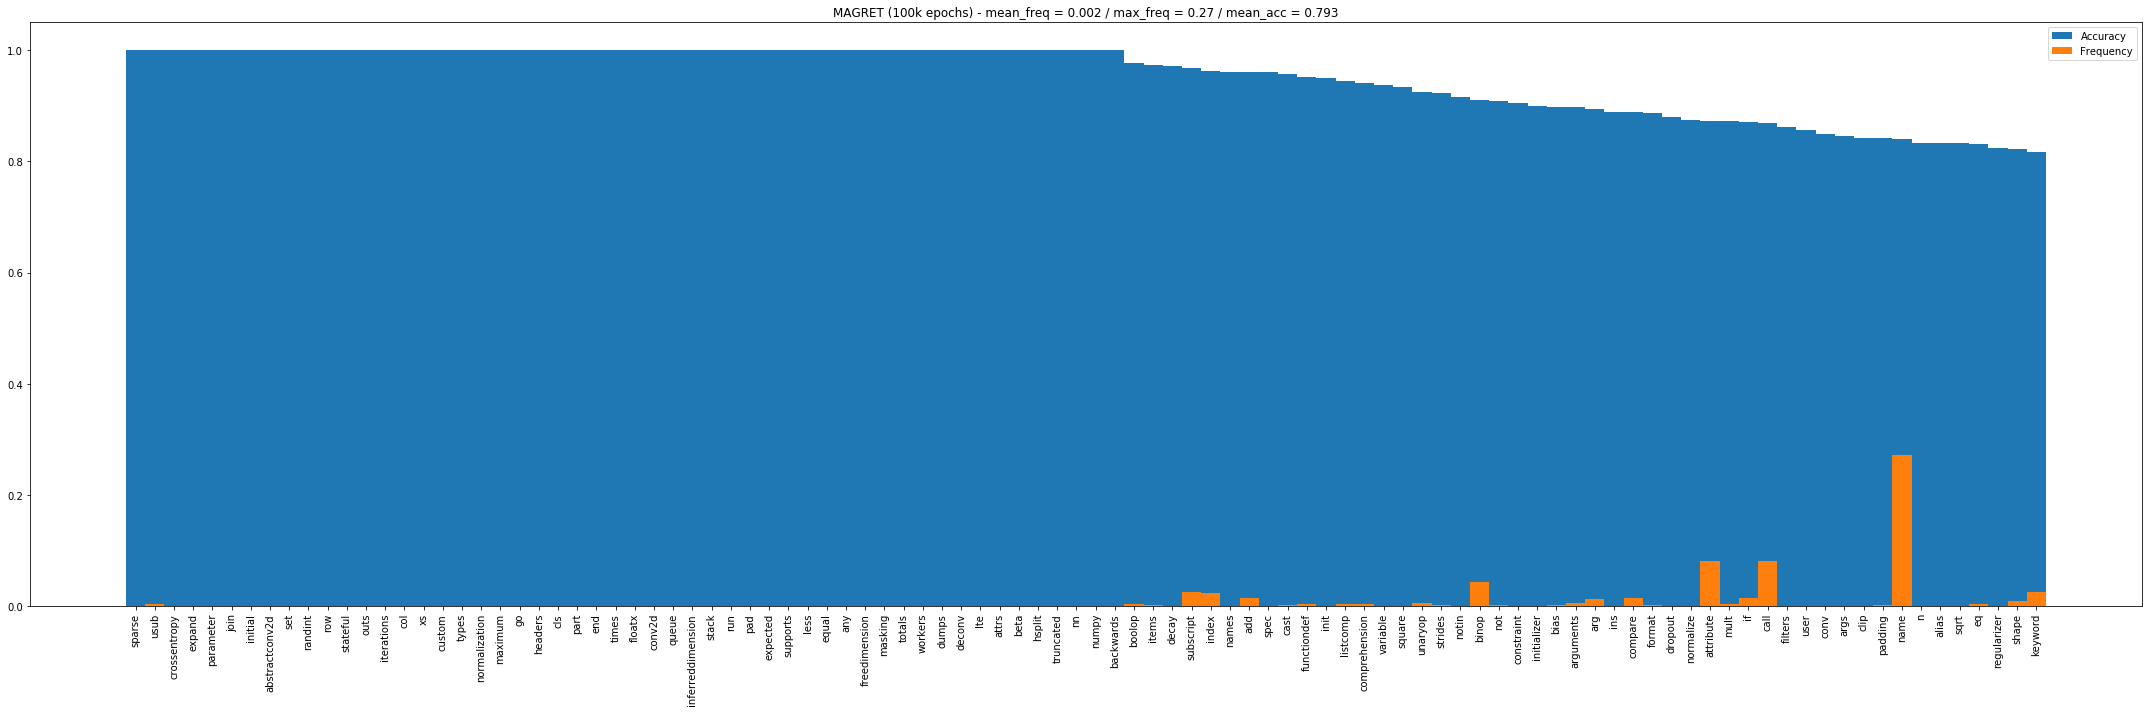

In [48]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(100))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('MAGRET-100k_epochs_top100.png')
plt.show()

In [30]:
pred = list(results_df.loc[10][3:])
pred

[2,
 398,
 53,
 1142,
 95,
 25,
 53,
 1142,
 298,
 25,
 38,
 25,
 961,
 4,
 655,
 7,
 98,
 319,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [32]:
pred_str

['[CLS]',
 'return',
 'call',
 'attribute',
 'mean',
 'name',
 'call',
 'attribute',
 'square',
 'name',
 'binop',
 'name',
 'sub',
 '[MASK]',
 'keyword',
 'unaryop',
 'usub',
 'num',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [33]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.27117486338797814),
 ('call', 0.0812568306010929),
 ('attribute', 0.0805464480874317),
 ('num', 0.043469945355191254),
 ('binop', 0.04262295081967213),
 ('str', 0.040437158469945354),
 ('subscript', 0.026065573770491804),
 ('keyword', 0.025136612021857924),
 ('assign', 0.024918032786885248),
 ('index', 0.023005464480874316),
 ('if', 0.015218579234972678),
 ('add', 0.014890710382513661),
 ('compare', 0.01423497267759563),
 ('tuple', 0.013961748633879782),
 ('arg', 0.013333333333333334),
 ('nameconstant', 0.010710382513661203),
 ('return', 0.00912568306010929),
 ('shape', 0.008469945355191256),
 ('expr', 0.006010928961748634),
 ('unaryop', 0.005846994535519126),
 ('arguments', 0.005573770491803279),
 ('slice', 0.005409836065573771),
 ('x', 0.005273224043715847),
 ('raise', 0.004754098360655738),
 ('list', 0.004726775956284153),
 ('mult', 0.004289617486338798),
 ('functiondef', 0.003934426229508197),
 ('comprehension', 0.0037431693989071037),
 ('sub', 0.0036885245901639345),
 

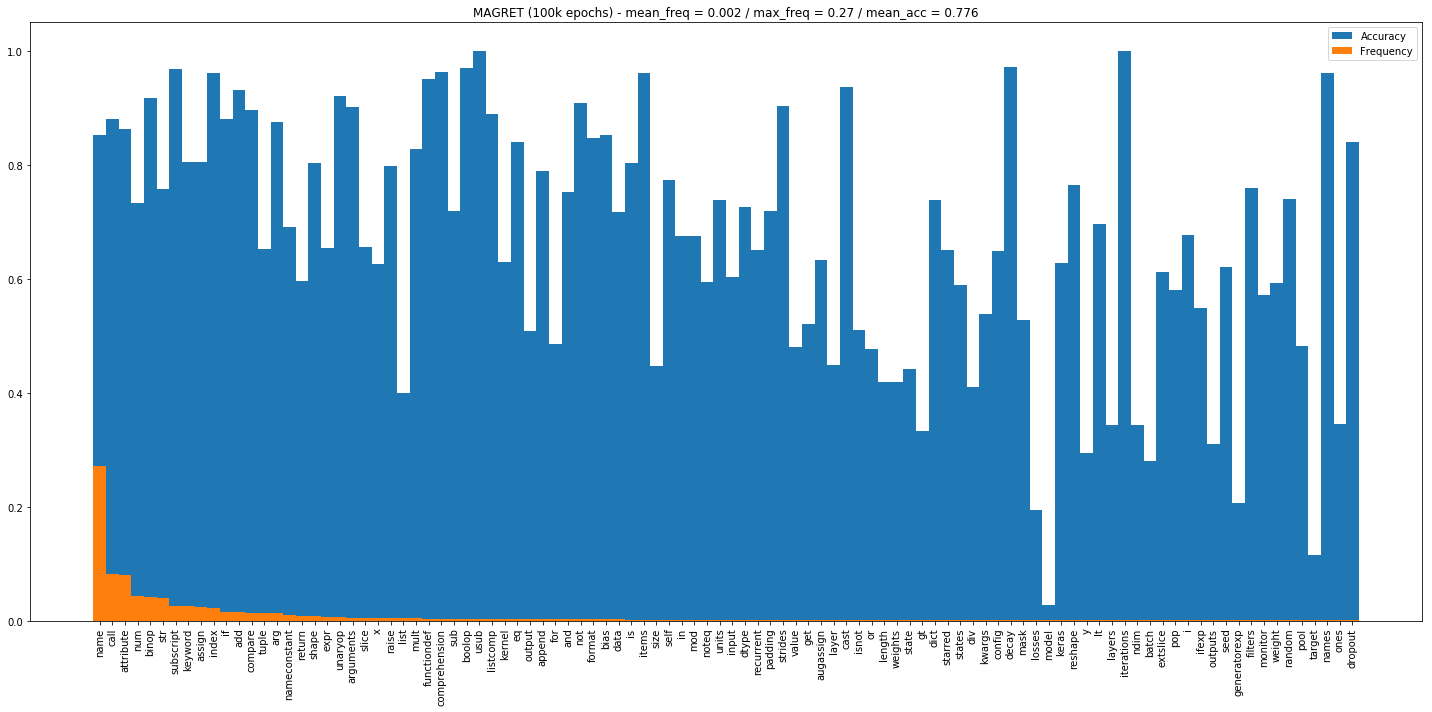

In [36]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-freq-100k_epochs_top100.png')
plt.show()

In [61]:
confusion = {}

In [62]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if confusion.get(label, None) == None:
        confusion[label] = []
    if prediction != label:
        confusion[label].append(prediction)

In [68]:
confusion_counter = {c: Counter(confusion[c]) for c in confusion}

In [69]:
confusion_counter

{'1': Counter({'2': 2, 'binop': 3}),
 '2': Counter({'binop': 1}),
 'a': Counter({'h': 1, 'y': 2}),
 'abs': Counter({'exp': 1, 'max': 2, 'mean': 1, 'name': 3}),
 'abstract': Counter({'nn': 1}),
 'abstractconv2d': Counter(),
 'accuracy': Counter({'img': 1, 'in': 3}),
 'activation': Counter({'bias': 2, 'items': 3, 'kernel': 1, 'name': 1}),
 'active': Counter({'tuple': 5}),
 'activity': Counter({'build': 1, 'kernel': 1}),
 'add': Counter({'call': 1,
          'mod': 2,
          'mult': 5,
          'name': 3,
          'num': 2,
          'str': 1,
          'sub': 7}),
 'additional': Counter({'nameconstant': 4}),
 'adj': Counter({'name': 5}),
 'after': Counter({'shape': 2}),
 'alias': Counter({'str': 1}),
 'all': Counter({'y': 2}),
 'alpha': Counter({'arg': 3}),
 'alt': Counter({'axis': 3}),
 'and': Counter({'assign': 1, 'attribute': 4, 'name': 8, 'or': 16}),
 'any': Counter(),
 'append': Counter({'assign': 1,
          'comprehension': 1,
          'if': 1,
          'init': 2,
        

In [84]:
for key, c in confusion_counter.items():
    print("Label -- ", key)
    print('Preds -- ',' '.join(["{} ({})".format(c0, c1) for c0,c1 in c.most_common(5)]))
    print()

Label --  negative
Preds --  part (2) gt (1)

Label --  functions
Preds --  keyword (3) name (1)

Label --  while
Preds --  tuple (3) name (1)

Label --  input
Preds --  num (6) kernel (6) name (3) binop (2) x (2)

Label --  moving
Preds --  variance (3)

Label --  path
Preds --  class (2) append (2) set (1) split (1) build (1)

Label --  contents
Preds --  name (3)

Label --  or
Preds --  and (19) tuple (2)

Label --  ndarray
Preds --  if (5) keys (2) num (1)

Label --  msg
Preds --  keyword (1) ndarray (1)

Label --  zeros
Preds --  constant (5) cell (2) placeholder (2) size (1)

Label --  maxval
Preds --  stddev (4)

Label --  th
Preds --  padding (2) output (1)

Label --  symbol
Preds --  fn (2)

Label --  random
Preds --  append (4) keyword (2) index (1)

Label --  times
Preds --  

Label --  sparse
Preds --  

Label --  squeeze
Preds --  cast (2) reshape (2)

Label --  monitor
Preds --  mode (5) best (5) size (2)

Label --  outputs
Preds --  nodes (4) metrics (3) states (3) outpu

Label --  scope
Preds --  for (3) binop (3) variable (2) append (1)

Label --  extra
Preds --  expand (2) set (1)

Label --  index
Preds --  slice (12) name (8) add (6) multiprocessing (2) tuple (1)

Label --  label
Preds --  data (4) call (1)

Label --  session
Preds --  run (3) freedimension (1)

Label --  abs
Preds --  name (3) max (2) exp (1) mean (1)

Label --  dimshuffle
Preds --  transpose (3) format (3)

Label --  max
Preds --  axis (3) nn (2) transpose (2) num (1) mean (1)

Label --  keepdims
Preds --  axis (1)

Label --  history
Preds --  shape (6) name (1)

Label --  exists
Preds --  append (10) join (3)

Label --  constant
Preds --  name (5) mean (4) variable (1)

Label --  maxlen
Preds --  split (1)

Label --  uid
Preds --  sequence (1)

Label --  predict
Preds --  device (4) self (2) nn (1)

Label --  co
Preds --  output (1) keyword (1)

Label --  gru
Preds --  regularizer (5)

Label --  unroll
Preds --  backwards (1)

Label --  pred
Preds --  name (2)

Label --  sequence

In [87]:
token_names = ["Module","Interactive","Expression","Suite","FunctionDef","AsyncFunctionDef","ClassDef","Return","Delete","Assign","AugAssign","For","AsyncFor","While","If","With","AsyncWith","Raise","Try","Assert","Import","ImportFrom","Global","Nonlocal","Expr","Pass","Break","Continue","BoolOp","BinOp","UnaryOp","Lambda","IfExp","Dict","Set","ListComp","SetComp","DictComp","GeneratorExp","Await","Yield","YieldFrom","Compare","Call","Num","Str","FormattedValue","JoinedStr","Bytes","NameConstant","Ellipsis","Constant","Attribute","Subscript","Starred","Name","List","Tuple","Load","Store","Del","AugLoad","AugStore","Param","Slice","ExtSlice","Index","And","Or","Add","Sub","Mult","MatMult","Div","Mod","Pow","LShift","RShift","BitOr","BitXor","BitAnd","FloorDiv","Invert","Not","UAdd","USub","Eq","NotEq","Lt","LtE","Gt","GtE","Is","IsNot","In","NotIn","excepthandler","ExceptHandler","arguments","arg","keyword","alias","withitem","comprehension"]
token_names = [t.lower() for t in token_names]

In [90]:
def is_ast_token(t):
    return t in token_names

In [101]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_ast_token(prediction) == is_ast_token(label)
    if prediction != label:
        if right:
            mistaken[label]['correct'] += 1
            tot_right += 1
        else:
            mistaken[label]['wrong'] += 1
            tot_wrong += 1

In [102]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.7645970937912814, 0.23540290620871862)

In [103]:
0.8 + 0.7645 * 0.2

0.9529000000000001

In [104]:
MOD_SYMBOLS = ["Module", "Interactive", "Expression", "Suite"]
STMT_SYMBOLS = ["FunctionDef", "AsyncFunctionDef", "ClassDef", "Return", "Delete", \
                "Assign", "AugAssign", "For", "AsyncFor", "While", "If", "With", "AsyncWith", \
                "Raise", "Try", "Assert", "Import", "ImportFrom", "Global", "Nonlocal", \
                "Expr", "Pass", "Break", "Continue"]
EXPR_SYMBOLS = ["BoolOp", "BinOp", "UnaryOp", "Lambda", "IfExp", "Dict", "Set", "ListComp", \
                "SetComp", "DictComp", "GeneratorExp", "Await", "Yield", "YieldFrom", \
                "Compare", "Call", "Num", "Str", "FormattedValue", "JoinedStr", "Bytes", \
                "NameConstant", "Ellipsis", "Constant", "Attribute", "Subscript", \
                "Starred", "Name", "List", "Tuple"]
EXPR_CONTENT_SYMBOLS = ["Load", "Store", "Del", "AugLoad", "AugStore", "Param"]
SLICE_SYMBOLS = ["Slice", "ExtSlice", "Index"]
BOOLOP_SYMBOLS = ["And", "Or"]
OPERATOR_SYMBOLS = ["Add", "Sub", "Mult", "MatMult", "Div", "Mod", "Pow", "LShift", "RShift", \
                    "BitOr", "BitXor", "BitAnd", "FloorDiv"]
UNARYOP_SYMBOLS = ["Invert", "Not", "UAdd", "USub"]
CMPOP_SYMBOLS = ["Eq", "NotEq", "Lt", "LtE", "Gt", "GtE", "Is", "IsNot", "In", "NotIn"]
COMPREHENSION_SYMBOLS = ["comprehension"]
EXCEPT_SYMBOLS = ["excepthandler", "ExceptHandler"]
ARG_SYMBOLS = ["arguments", "arg", "keyword"]
IMPORT_SYMBOLS = ["alias", "withitem"]

In [105]:
def to_lower(l):
    return [l_.lower() for l_ in l]

In [106]:
MOD_SYMBOLS = to_lower(MOD_SYMBOLS)
STMT_SYMBOLS = to_lower(STMT_SYMBOLS)
EXPR_SYMBOLS = to_lower(EXPR_SYMBOLS)
EXPR_CONTENT_SYMBOLS = to_lower(EXPR_CONTENT_SYMBOLS)
SLICE_SYMBOLS = to_lower(SLICE_SYMBOLS)
BOOLOP_SYMBOLS = to_lower(BOOLOP_SYMBOLS)
OPERATOR_SYMBOLS = to_lower(OPERATOR_SYMBOLS)
UNARYOP_SYMBOLS = to_lower(UNARYOP_SYMBOLS)
CMPOP_SYMBOLS = to_lower(CMPOP_SYMBOLS)
COMPREHENSION_SYMBOLS = to_lower(COMPREHENSION_SYMBOLS)
EXCEPT_SYMBOLS = to_lower(EXCEPT_SYMBOLS)
ARG_SYMBOLS = to_lower(ARG_SYMBOLS)
IMPORT_SYMBOLS = to_lower(IMPORT_SYMBOLS)

In [107]:
def get_token_class_id(t):
    if t in MOD_SYMBOLS: return 0
    if t in STMT_SYMBOLS: return 1
    if t in EXPR_SYMBOLS: return 2
    if t in EXPR_CONTENT_SYMBOLS: return 3
    if t in SLICE_SYMBOLS: return 4
    if t in BOOLOP_SYMBOLS: return 5
    if t in OPERATOR_SYMBOLS: return 6
    if t in UNARYOP_SYMBOLS: return 7
    if t in CMPOP_SYMBOLS: return 8
    if t in ARG_SYMBOLS: return 9
    if t in EXCEPT_SYMBOLS: return 10
    if t in COMPREHENSION_SYMBOLS: return 11
    if t in IMPORT_SYMBOLS: return 12
    else: return 13

In [110]:
def is_same_class(t0, t1):
    return get_token_class_id(t0) == get_token_class_id(t1)

In [170]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_same_class(prediction, label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [171]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9109836065573771, 0.08901639344262295)

In [149]:
classes = ["MOD", "STMT", "EXPR", "EXPR_CONT", "SLICE", "BOOLOP", "OPERATOR", "UNARY", "CMPOP", "COMPR", "EXCEPT", "ARG", "IMPORT", "VAR"]

In [152]:
confusion_mat = np.zeros((14,14))
class_freqs = {str(i):0 for i in range(14)};
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    confusion_mat[t0][t1] += 1
    class_freqs[str(t1)] += 1

In [173]:
confusion_mat

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 2.1230e+03, 4.0600e+02, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 4.6000e+01,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.4000e+02],
       [0.0000e+00, 2.9600e+02, 2.2159e+04, 0.0000e+00, 2.2000e+01,
        1.4000e+01, 1.4000e+01, 0.0000e+00, 2.2000e+01, 1.5000e+02,
        1.0000e+00, 5.0000e+00, 5.0000e+00, 6.3400e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 8.0000e+00, 6.4000e+01, 0.0000e+00, 1.0370e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01],
       [0.0000e+00, 1.0000e+00, 0.0

In [154]:
freqs = {k: v/len(results_df) for k,v in class_freqs.items()}
freqs

{'0': 0.0,
 '1': 0.06975409836065574,
 '10': 0.0002185792349726776,
 '11': 0.0037431693989071037,
 '12': 0.000819672131147541,
 '13': 0.15475409836065573,
 '2': 0.6474590163934426,
 '3': 8.19672131147541e-05,
 '4': 0.02926229508196721,
 '5': 0.003961748633879781,
 '6': 0.026475409836065573,
 '7': 0.006174863387978142,
 '8': 0.013251366120218579,
 '9': 0.044043715846994534}

In [177]:
np.sum(confusion_mat, axis=0)

array([0.0000e+00, 2.5530e+03, 2.3697e+04, 3.0000e+00, 1.0710e+03,
       1.4500e+02, 9.6900e+02, 2.2600e+02, 4.8500e+02, 1.6120e+03,
       8.0000e+00, 1.3700e+02, 3.0000e+01, 5.6640e+03])

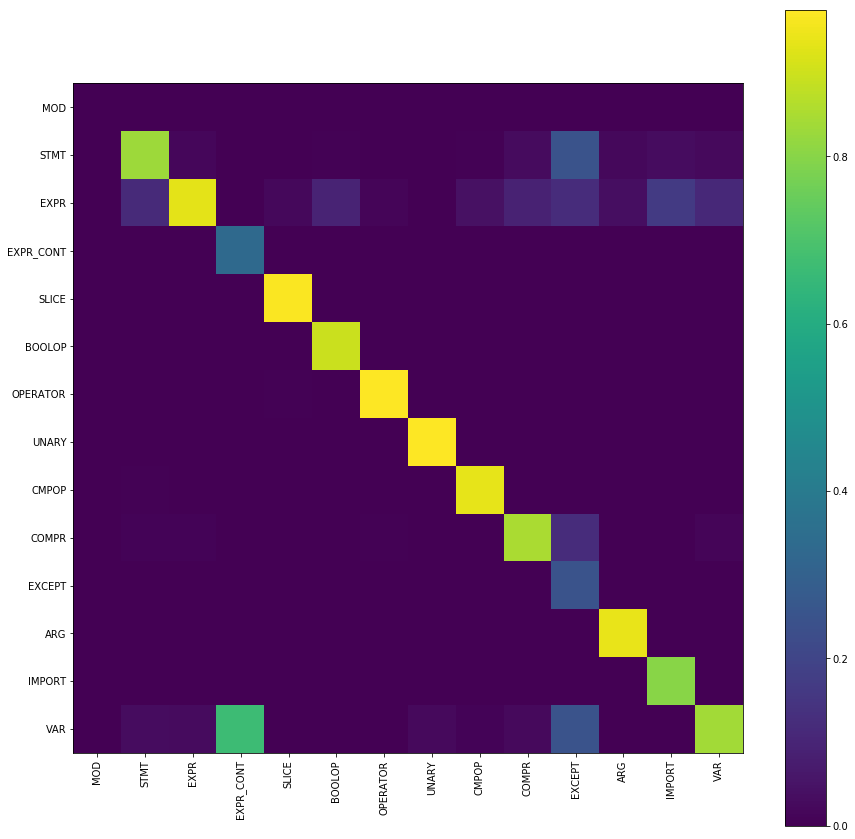

In [178]:
plt.figure(figsize=(15,15))
n = np.sum(confusion_mat, axis=0)
n[0] = 1
plt.imshow(confusion_mat / n)
plt.xticks(range(14), classes, rotation=90)
plt.yticks(range(14), classes)
plt.colorbar()

MOD 0.0 0 0.0
STMT 0.832 2553 0.07
EXPR 0.935 23697 0.647
EXPR_CONT 0.333 3 0.0
SLICE 0.968 1071 0.029
BOOLOP 0.897 145 0.004
OPERATOR 0.974 969 0.026
UNARY 0.973 226 0.006
CMPOP 0.938 485 0.013
COMPR 0.85 1612 0.044
EXCEPT 0.25 8 0.0
ARG 0.942 137 0.004
IMPORT 0.8 30 0.001
VAR 0.838 5664 0.155


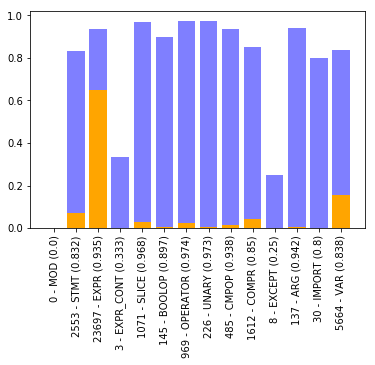

In [179]:
n = np.sum(confusion_mat, axis=0)
n[0] = 1
normed = confusion_mat / n
for i in range(14):
    plt.bar(classes[i], np.around(normed[i][i],3), color='b', alpha=0.5)
    plt.bar(classes[i], np.around(freqs[str(i)],3), color='orange')
    print(classes[i], np.around(normed[i][i],3), class_freqs[str(i)], np.around(freqs[str(i)],3))
plt.xticks(range(14), [str(class_freqs[str(i)])+" - "+c + " (" + str(np.around(normed[i][i],3)) + ")" for i,c in enumerate(classes)], rotation=90);

In [124]:
n = np.linalg.norm(confusion_mat, axis=0)
n[0] = 1
n

array([1.00000000e+00, 2.14534683e+03, 2.21755757e+04, 2.23606798e+00,
       1.03726323e+03, 1.30755497e+02, 9.44128699e+02, 2.20081803e+02,
       4.55568875e+02, 1.38056003e+03, 3.74165739e+00, 1.29131716e+02,
       2.45356883e+01, 4.79203840e+03])

In [117]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

In [118]:
X_scaled = scale(confusion_mat, -1, 1)

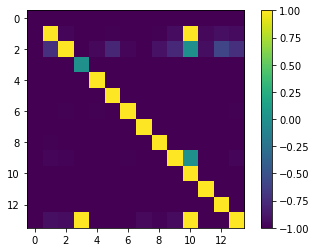

In [119]:
plt.imshow(X_scaled)
plt.colorbar()